In [1]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [2]:
path_to_mallet = 'C:/mallet/bin/mallet'  # CHANGE THIS TO YOUR MALLET PATH

<br><br>

# Load poetry dataset

Data is available here:  
https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [4]:
poetry_path = 'kaggle_poem_dataset.csv'  # CHANGE THIS TO YOUR DATASET PATH

In [5]:
poetry_df = pd.read_csv(poetry_path,encoding="utf-8")
poetry_df.sample(5)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
471,471,Christina Rossetti,Amor Mundi,46454,“Oh where are you going with your love-locks f...
3780,3780,Lisel Mueller,The End of Science Fiction,54641,"This is not fantasy, this is our life.\nWe are..."
10836,10836,Jane Hirshfield,The Promise,55584,"Stay, I said\nto the cut flowers.\nThey bowed\..."
5170,5170,Miller Williams,Going Deaf,52373,No matter how she tilts her head to hear\nshe ...
13990,13990,Lucille Lang Day,Tooth Painter,53310,"He was tall, lean, serious\nabout his professi..."


In [31]:
# print(poetry_df.index) #index：第一列？
print(len(poetry_df.index))

15652


In [6]:
#第一行写“contend”的列，变成list，遍历每一格的值，用process_string处理，做list的一项，
#准备文本 停用词 大小写 空格等
training_data = [lmw.process_string(t) for t in poetry_df['Content'].tolist()]
# training_data = [t for t in poetry_df['Contendivide_training_datat'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

15644

In [ ]:
training_data[10]

In [7]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

In [ ]:
lmw.print_dataset_stats(training_data) #显示有关训练数据集的基本统计信息

<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

If you're training in a Jupyter notebook, you can observe progress by checking the terminal window from which you started Jupyter. The MALLET output will also be printed at the end of training.

Note that training creates a copy of your dataset, so it might require significant space.

## Training Option B: Train using import and training functions

Use these functions to have more control over the training parameters and output paths.

In [8]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = 'demo-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

    lmw.import_data：原始数据 -> txt格式数据 -> MALLET格式数据
  
  2：txt格式数据

  3: MALLET 格式数据

  4：原始数据

In [ ]:

lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


使用 MALLET 训练 LDA 主题模型

In [ ]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...
Complete


训练主题模型后，为每个主题加载最多的最可能单词集
每个主题最多20个词


In [13]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 said could one would came saw went father knew took
1 	 like say get got says mother want know good let
2 	 may yet still good man whose nature must well mind
3 	 NUM 镁at hym ful watz hit alle 镁ay hem bot
4 	 god men man death dead blood war lord let king
5 	 thir thou heav thy thee thus god earth though son
6 	 eat way cat tea chicken bread milk fish give little
7 	 self mind body space form sense without world human thought
8 	 heart night upon like day long light yet life far
9 	 pink que duke beads les qui faustine des est mon
10 	 horse mud cut iron wood fire half dirt blood two
11 	 poem book read poet poetry one poems write writing wrote
12 	 water sea like sky light river wind night sun black
13 	 like eyes hands face body back white hand head hair
14 	 one know like time love would say see even way
15 	 thy thou love thee shall heart hath yet doth sweet
16 	 镁忙t ond w忙s swa 镁忙r 忙fter mid ofer dat hie
17 	 NUM america american war people used women name united new
18 	 gree

在训练主题模型后加载每个文档的主题分布

In [10]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.' + str(num_topics))

len(topic_distributions), len(topic_distributions[0])

(15644, 20)

In [11]:
assert(len(topic_distributions) == len(training_data))

获取属于topic_index指示的topic的，概率最高的doc

n：输出n个doc

topic_index：第几个topic

In [ ]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d) #概率取小数点后4位
    print()

0.7278 little brother brought mother said want another little brother change said bother took father said little bother brother strange said one little brother exactly like another every little brother misbehaves bit said took little bother mother father put little bother brother back bed

0.666 cut hands grown new ones something former hands longed came asked rocked plucked eyes withered new ones grown something former eyes wept came asking pitied

0.6222 walter one evening explained beatrice needed time beatrice pulled last bite fish walter mouth shook wished said instead needed timbrel would gone together spectacle timbrelist often played walter need timbrel walter needed time beatrice wrapped left fish red wool cloth set find cold outside time wondered beatrice would watched humans distance breathe grass time wondered beatrice would remind held last bite fish mouth warmth began feel heavy hands wished said instead needed timbrel wished walter time needed unwrapped last bite fish st

加载主题词分布。这些是每个主题的每个单词的概率

In [ ]:
topic_word_probability_dict = lmw.load_topic_word_distributions(output_directory_path + '/mallet.word_weights.' + str(num_topics))

len(topic_word_probability_dict)

20

In [ ]:
for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(round(_probability, 4), '\t', _word)
    print()

Topic 0
0.0228 	 said
0.0154 	 could
0.0146 	 one
0.0135 	 would
0.0131 	 came

Topic 1
0.0134 	 like
0.012 	 say
0.0112 	 get
0.0104 	 got
0.0103 	 says

Topic 2
0.008 	 may
0.0072 	 yet
0.005 	 good
0.005 	 still
0.0049 	 man

Topic 3
0.0348 	 NUM
0.0266 	 镁at
0.0093 	 hym
0.008 	 ful
0.0072 	 watz

Topic 4
0.0234 	 god
0.0157 	 men
0.0146 	 man
0.0107 	 death
0.0095 	 dead

Topic 5
0.0147 	 thir
0.0117 	 thou
0.0114 	 heav
0.0107 	 thy
0.0093 	 thee

Topic 6
0.0096 	 eat
0.0085 	 way
0.0058 	 cat
0.0058 	 tea
0.0052 	 chicken

Topic 7
0.0052 	 self
0.0048 	 mind
0.0044 	 body
0.0042 	 space
0.0041 	 form

Topic 8
0.0075 	 heart
0.0068 	 night
0.0067 	 upon
0.0062 	 like
0.0059 	 day

Topic 9
0.0072 	 pink
0.0058 	 que
0.0037 	 duke
0.0036 	 beads
0.0036 	 les

Topic 10
0.0055 	 horse
0.0055 	 mud
0.0047 	 cut
0.0037 	 iron
0.0033 	 wood

Topic 11
0.014 	 poem
0.0116 	 book
0.0112 	 read
0.0096 	 poet
0.0095 	 poetry

Topic 12
0.0171 	 water
0.0155 	 sea
0.0123 	 like
0.01 	 sky
0.00

计算两个目标主题分布之间的 Jensen-Shannon 散度

In [ ]:
lmw.get_js_divergence_topics(0, 7, topic_word_probability_dict)

<br><br>

# Plot topics by category

如果数据集包含一段时间的分类标签，则创建标签 x 主题的热图

C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Download\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_

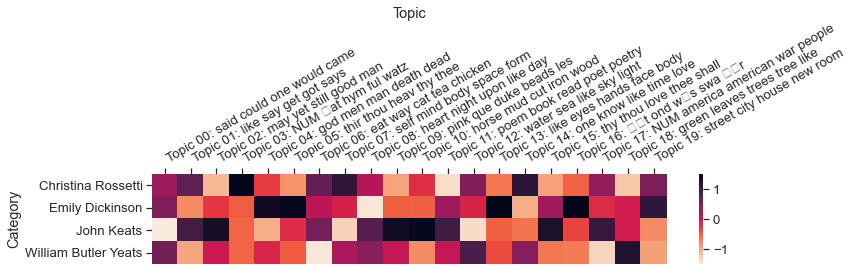

In [14]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(12,4))

如果数据集包含一些时间的分类标签，则创建一组箱线图，每个主题一个图。

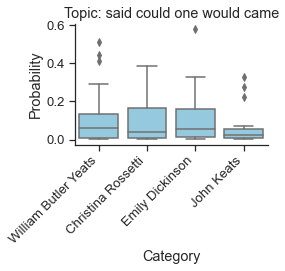

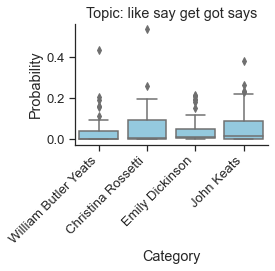

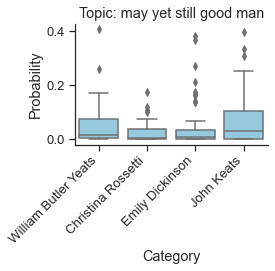

C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)


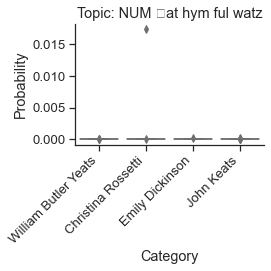

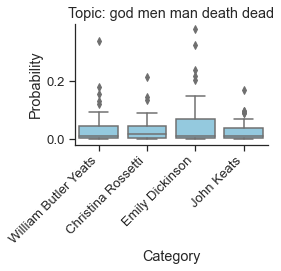

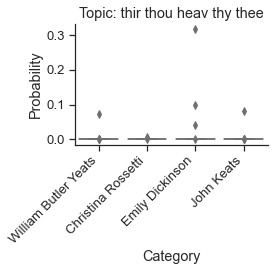

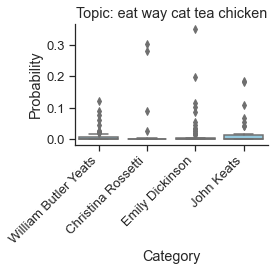

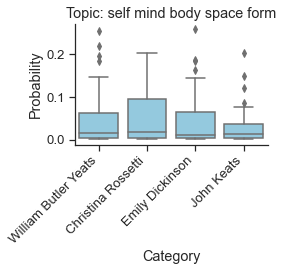

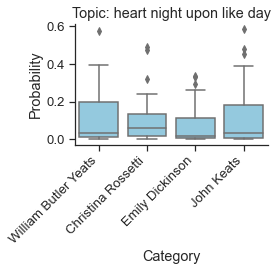

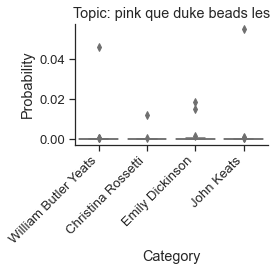

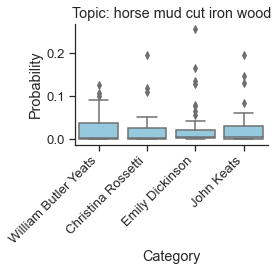

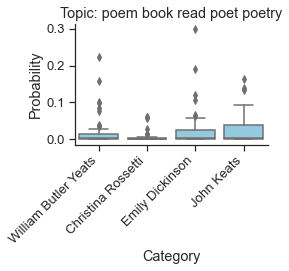

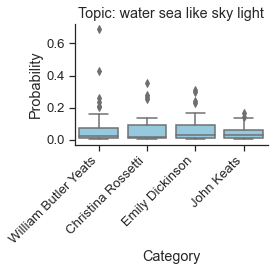

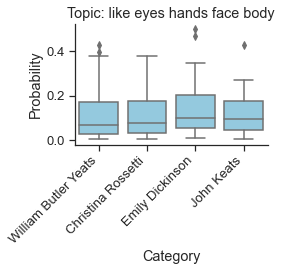

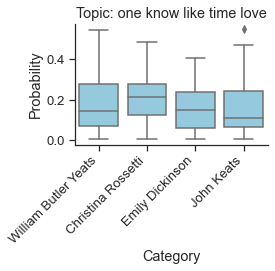

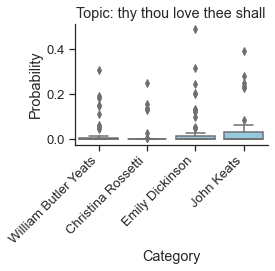

C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Download\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0, f

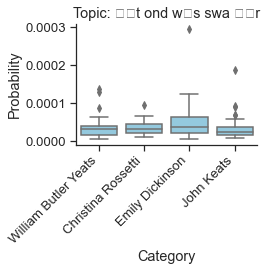

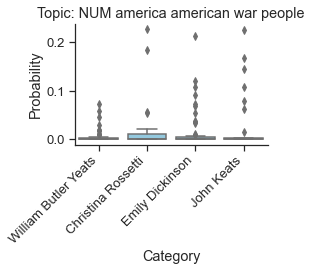

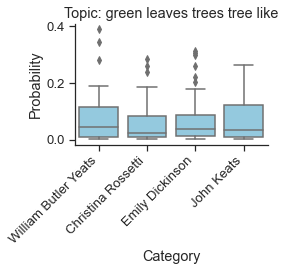

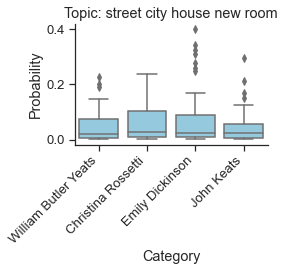

In [15]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over document time

Splits each training document into N chunks, infers the topics for those chunks (using the pre-trained topic model), and plots mean topic probabilities over document time.

In the example shown, it looks like poems often start with physical descriptions and end with abstract and romantic language.

给定一个数据集，将每个文档分成num_chunks个doc

In [20]:
divided_documents, document_ids, times = lmw.divide_training_data(training_data,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156440, 156440, 156440)

In [17]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

    lmw.import_data：原始数据 -> txt格式数据 -> MALLET格式数据
  
  2：txt格式数据

  3: MALLET 格式数据

  4：原始数据

In [ ]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                use_pipe_from=path_to_formatted_training_data)

Importing data using pipe...
Complete


# **模型使用**
使用已在另一组文档上训练的模型获取一组新文档的主题分布

In [ ]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...
Complete


在训练主题模型后加载每个文档的主题分布

In [18]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(156440, 20)

创建线图，每个主题一个，显示文档段的平均主题概率

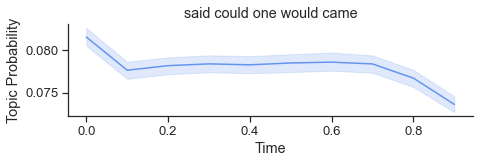

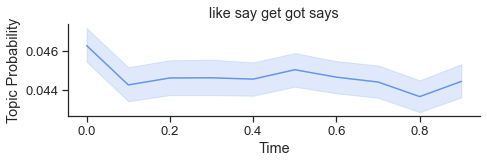

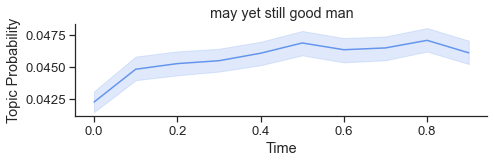

C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0, flags=flags)


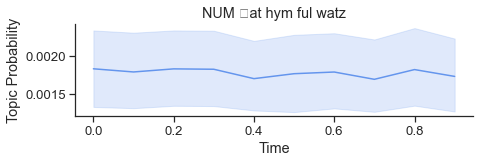

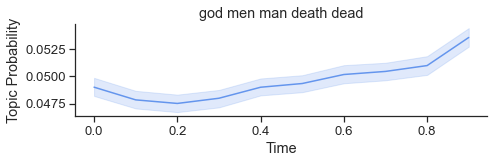

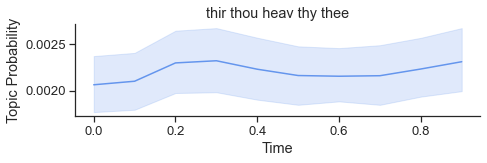

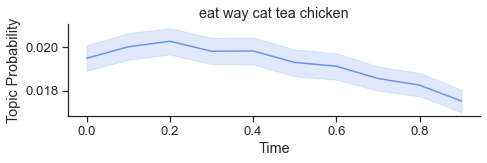

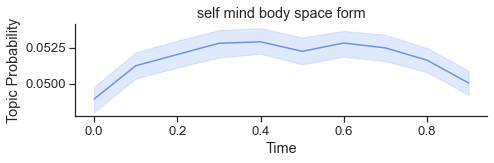

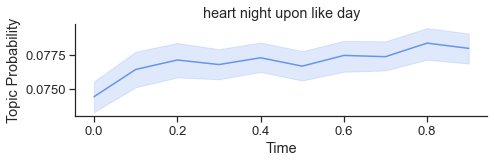

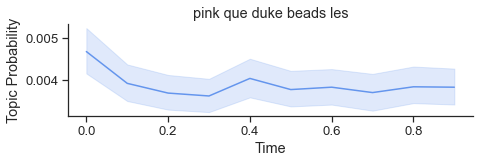

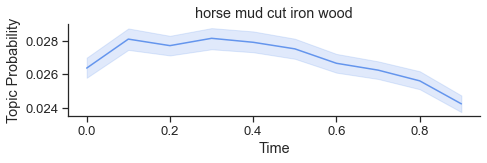

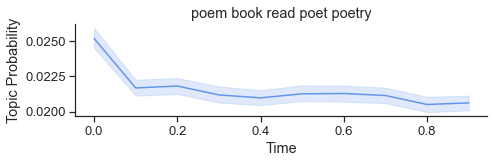

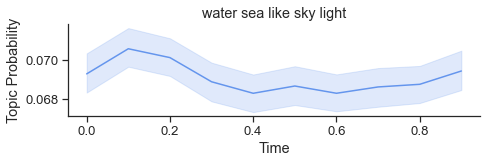

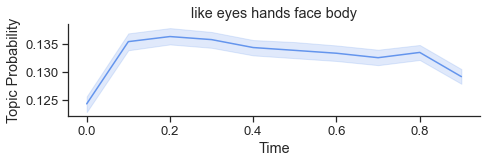

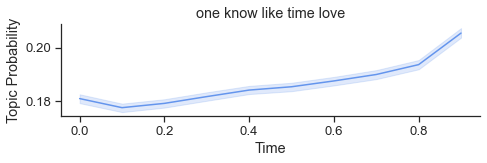

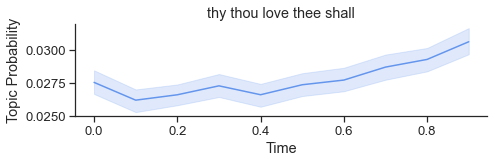

C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Download\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24537 missing from current font.
  font.set_text(s, 0, flags=flags)


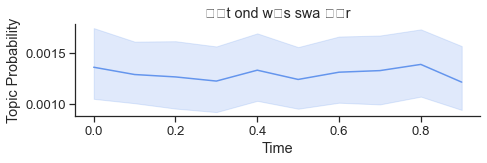

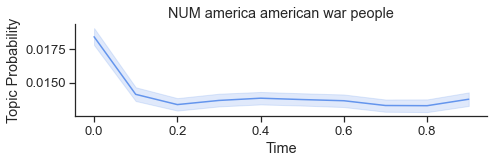

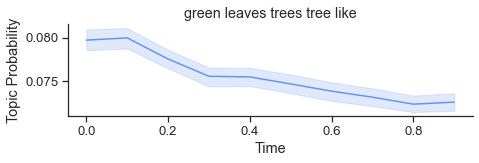

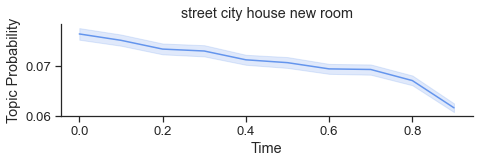

In [21]:
for _topic_index in range(0, len(topic_keys)):
    lmw.plot_topics_over_time(topic_distributions, topic_keys, times, _topic_index)